In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_excel('cleaned.xlsx')

In [3]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,1.720979,98.907149,0,0,1
1,2013,4.75,2.255493,116.919996,1,0,1
2,2017,7.25,2.287471,60.252218,0,0,1
3,2011,2.85,1.423108,54.300312,0,0,1
4,2014,4.60,1.927164,116.381220,1,0,1
...,...,...,...,...,...,...,...
291,2016,9.50,2.451005,107.449775,1,0,1
292,2015,4.00,1.774952,131.742217,0,0,1
293,2009,3.35,2.397895,151.021928,0,0,1
294,2017,11.50,2.525729,66.406442,1,0,1


In [4]:
sc=StandardScaler()
df['Present_Price']=sc.fit_transform(df[['Present_Price']])
df['Kms_Driven']=sc.fit_transform(df[['Kms_Driven']])

In [5]:
X=df.drop(columns='Selling_Price')
y=df['Selling_Price']

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=94)

In [7]:
model=PCA(n_components=0.95)
X_train=model.fit_transform(X_train)
X_test=model.transform(X_test)

In [8]:
model.explained_variance_ratio_

array([0.79523121, 0.14016217, 0.04053705])

In [9]:
#modeling
pf=PolynomialFeatures(degree=2,include_bias=False)
X_train=pd.DataFrame(pf.fit_transform(X_train))
X_test=pd.DataFrame(pf.transform(X_test))

model=LinearRegression()
model.fit(X_train,y_train)
train_r2=r2_score(y_train,model.predict(X_train))
cross=cross_val_score(model,X_train,y_train,cv=5,scoring='r2').mean()
print('Coefficients of the model:',model.coef_)
print('Intercept of the model:',model.intercept_)
print("Train_r2",train_r2)
print('Cross validation score is:',cross)

Coefficients of the model: [-0.5364117  -3.88632182 -2.45792109  0.01982206  0.25730155  0.12377383
  2.00346053  2.13508684  0.80251309]
Intercept of the model: 1.0791249871290294
Train_r2 0.902254748954876
Cross validation score is: 0.8704285969051619


In [10]:
train_rmse=mean_squared_error(y_train,model.predict(X_train))
print('train rmse :',round(train_rmse**0.5))

train rmse : 2


In [11]:
#Evaluation
y_test_pred=model.predict(X_test)
test_r2=r2_score(y_test,y_test_pred)
print('test_r2:',test_r2)


test_r2: 0.928105945655776


In [12]:
test_rmse=mean_squared_error(y_test,y_test_pred)
print('test rmse :',round(test_rmse**0.5))

test rmse : 1


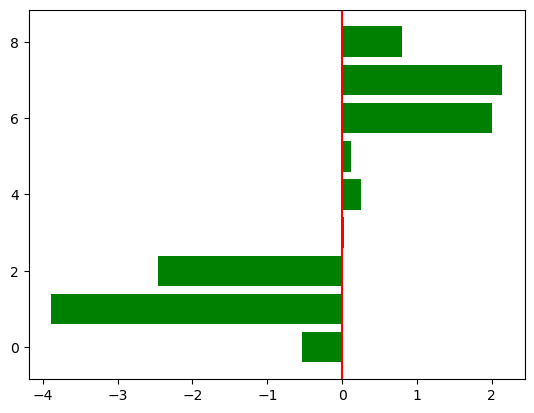

In [13]:
# creating the co efficients plots
coef_df=pd.DataFrame({
    'feature':X_train.columns,
    'coefficients':model.coef_})

plt.barh(coef_df['feature'],coef_df['coefficients'],color='g')
plt.axvline(x=0,color='r')
plt.show()

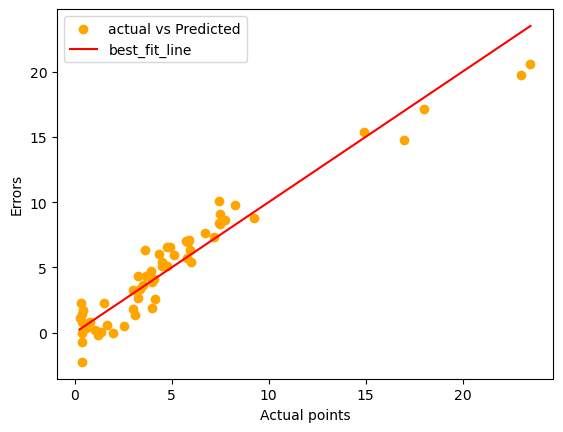

In [14]:
plt.scatter(y_test,y_test_pred,color='orange',label='actual vs Predicted')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red',label='best_fit_line')
plt.xlabel('Actual points')
plt.ylabel('Errors')
plt.legend()
plt.show()